# Scikit learn

* Contains dataset
* ML problems
    * Regression, classification and clustering algorithms

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Regression

* Line of best fit - from and X values I want to find a single Y values
* Equation of a line $y = mx+c$ or for multiple variables
$y= w_1x_1+w_2x_2 +\dots +w_nx_n + c$
* The boston dataset is a popular dataset used to understand regression
* We begin buy importing and loading the dataset into a variable 
* We will then create a dataframe from the data

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df_boston = pd.DataFrame(boston['data'])
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df_boston.columns = boston['feature_names']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df_boston['target'] = boston['target']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

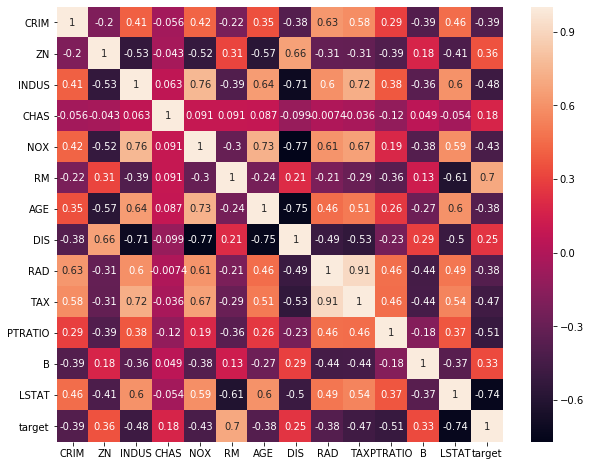

In [19]:
plt.figure(figsize=(10,8))
corrs = df_boston.corr()
sns.heatmap(corrs, annot=True)
plt.autoscale()

* RM has the strongest positive correslation to our target variable
* LSAT has the strongest negative correlation to our target variable
* These two variable would be useful in a regression model

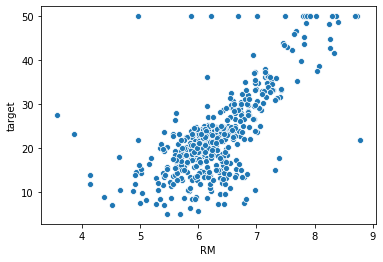

In [22]:
sns.scatterplot(data=df_boston, x ='RM', y = 'target')

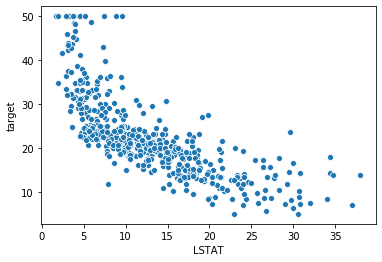

In [25]:
sns.scatterplot(data=df_boston, x ='LSTAT', y = 'target')

# Modelling

* We will just use LSTAT to create our regression model so we can visualise it
    * In real life we would be using multiple variables
* We will split our data into test and training sets
    * 75% train, 25% test
* Use linear regression to predict house prices
* `.fit()' will train our model - LEARNING

In [28]:
x = df_boston['LSTAT']
y = df_boston['target']

In [34]:
x.shape

(506,)

Our x values need to be 2 dimensional so we will insert another axis

In [37]:
x = x[:, np.newaxis]
x.shape

(506, 1)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 1)
(127, 1)
(379,)
(127,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print('weights', model.coef_) 
# each variable with have a weight, hence we get a list if we were using multiple variable

print('interception', model.intercept_)



weights [-0.94555395]
interception 34.451567767018034


Lets visualise our model

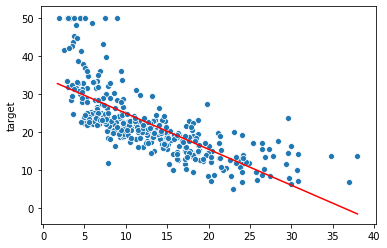

In [47]:
min_pt = x.min()*model.coef_[0] + model.intercept_
max_pt = x.max()*model.coef_[0] + model.intercept_

sns.lineplot([x.min(), x.max()], [min_pt, max_pt], color='r')
sns.scatterplot(x_train.ravel(), y_train)
# ravel makes data one dimensional

# Predicting

* We will use our model to predict the house prices
* Use a scatterplot to visualise the the predicted values against the actual values

In [48]:
y_predicted = model.predict(x_test)

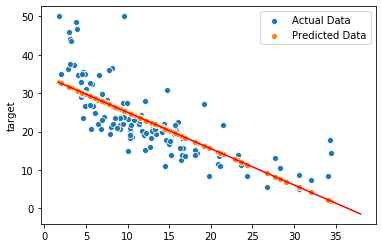

In [49]:
sns.scatterplot(x_test.ravel(), y_test, label='Actual Data')
sns.scatterplot(x_test.ravel(), y_predicted, label='Predicted Data')
sns.lineplot([x.min(), x.max()], [min_pt, max_pt], color='r')

# Evaluating
* We're using mean square error
* There are other scoring methods
* $ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \tilde{y})^2$

In [54]:
np.sqrt(mean_squared_error(y_test, y_predicted))

6.082892543136018